In [ ]:
from PIL import Image
import rawpy
from scipy.signal import convolve2d
import imageio
import matplotlib.pyplot as plt
import numpy as np
import cv2

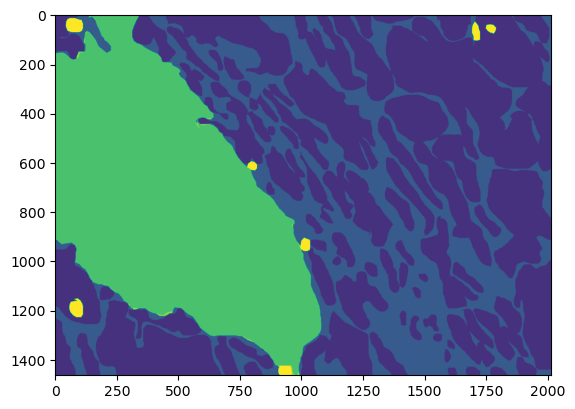

In [ ]:
# Reviewing the manual annotations of tissue in ROIs
image = cv2.imread('/Users/tianale/Documents/DSAN6500/Project/wsirois/roi-level-annotations/tissue-bcss/masks/TCGA-A1-A0SK-01Z-00-DX1.A44D70FA-4D96-43F4-9DD7-A61535786297_[22877, 12530, 24892, 13993].png', cv2.IMREAD_UNCHANGED)

plt.imshow(image)
plt.show()

In [ ]:
import cv2

def is_grayscale(image):
    # Check if the image is grayscale based on its shape
    if len(image.shape) == 2:
        return True
    elif len(image.shape) == 3 and image.shape[2] == 1:
        return True
    return False



# Check if the image is grayscale
if is_grayscale(image):
    print("The image is grayscale.")
else:
    print("The image is not grayscale.")


The image is grayscale.


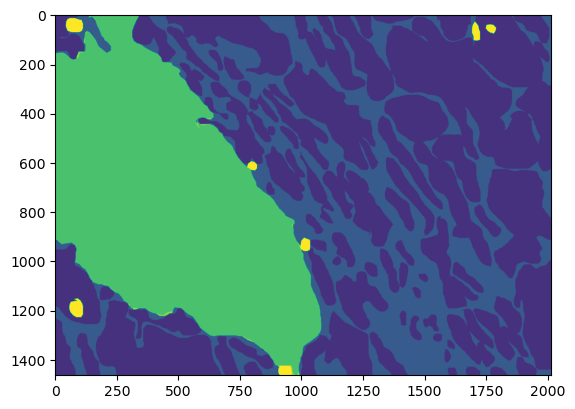

Unique colors in the image:
0
1
2
5
6
7


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading and reading the image
image_path = '/Users/tianale/Documents/DSAN6500/Project/wsirois/roi-level-annotations/tissue-bcss/masks/TCGA-A1-A0SK-01Z-00-DX1.A44D70FA-4D96-43F4-9DD7-A61535786297_[22877, 12530, 24892, 13993].png'
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Review the image
plt.imshow(image)
plt.show()

# Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, image.shape[2]) if len(image.shape) == 3 else image.reshape(-1)

# Find unique colors
unique_colors = np.unique(pixels, axis=0)

# Print the unique colors
print("Unique colors in the image:")
for color in unique_colors:
    print(color)



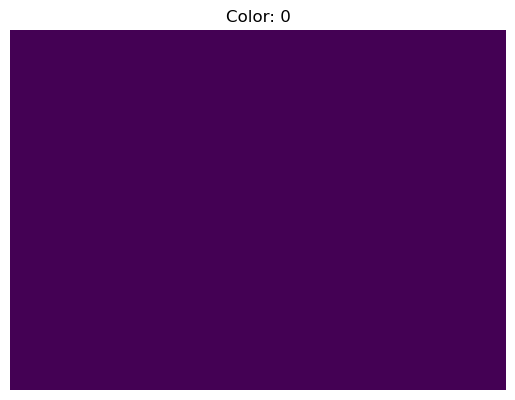

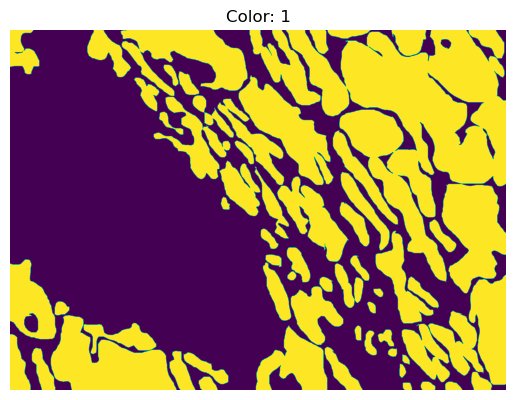

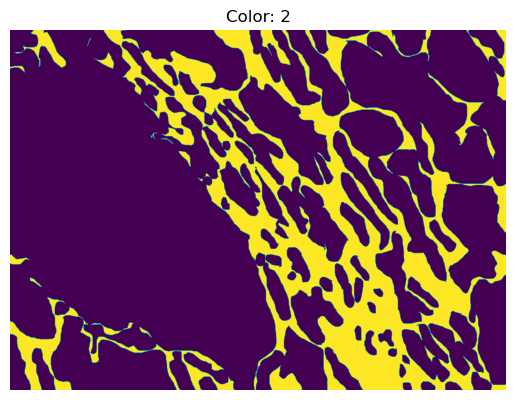

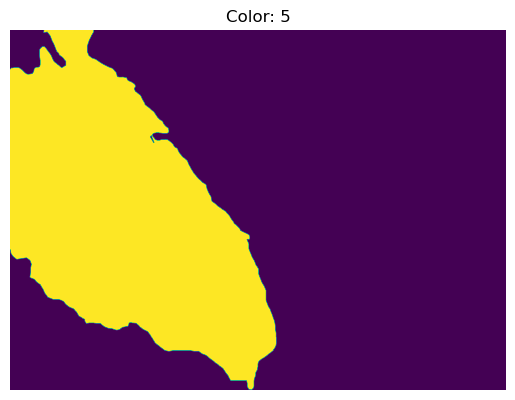

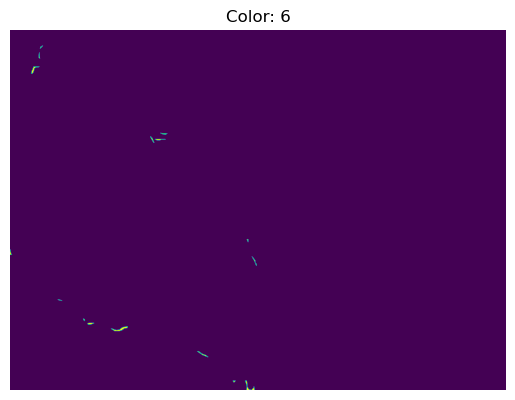

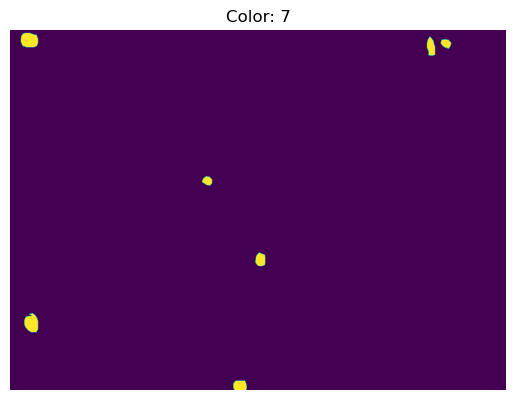

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Show the labels of the manually annotated ROIs
# Read the image
image_path = '/Users/tianale/Documents/DSAN6500/Project/wsirois/roi-level-annotations/tissue-bcss/masks/TCGA-A1-A0SK-01Z-00-DX1.A44D70FA-4D96-43F4-9DD7-A61535786297_[22877, 12530, 24892, 13993].png'
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, image.shape[2]) if len(image.shape) == 3 else image.reshape(-1)

# Find unique colors
unique_colors = np.unique(pixels, axis=0)

# For each unique color, display the image for each color
for color in unique_colors:
    # Initialize a mask for the current color
    if len(image.shape) == 3:
        mask = np.all(image == color, axis=-1)
    else:
        mask = image == color

    # Create an output image that shows the current color and all others are black
    output_image = np.zeros_like(image)
    if len(image.shape) == 3:
        output_image[mask] = color
    else:
        output_image[mask] = color


    # Display the image with only the current unique color
    plt.imshow(output_image)
    plt.title(f"Color: {color}")
    plt.axis('off')
    plt.show()


In [ ]:
print(unique_colors)

[0 1 2 5 6 7]


In [ ]:
import os
import cv2
import numpy as np
import shutil

# Source directory is masks
source_dir = '/Users/tianale/Documents/DSAN6500/Project/wsirois/roi-level-annotations/tissue-bcss/masks/'
# Masks from source directory will be sorted into two different directories
# class_6 includes inflamed stroma
destination_dir_class_6 = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/masks/class_6'
# class_6no does not include inflamed stroma
destination_dir_class_6no = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/masks/class_6no'

# Create the destination directories if they don't exist
os.makedirs(destination_dir_class_6, exist_ok=True)
os.makedirs(destination_dir_class_6no, exist_ok=True)

# Get the list of images in the source directory
image_files = [f for f in os.listdir(source_dir) if f.endswith('.png')]

for image_file in image_files:
    image_path = os.path.join(source_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Flatten the image to a 1D array of pixels
    pixels = image.reshape(-1) if len(image.shape) == 2 else image.reshape(-1, image.shape[2])

    # Find unique colors
    unique_colors = np.unique(pixels, axis=0)

    # Check if the image contains class 6 or class not 6
    contains_class_6 = np.any(unique_colors == 6)
    contains_class_6no = np.any(unique_colors != 6)

    # Copy the image to the appropriate directory
    if contains_class_6:
        shutil.copy(image_path, os.path.join(destination_dir_class_6, image_file))
    elif contains_class_6no:
        shutil.copy(image_path, os.path.join(destination_dir_class_6no, image_file))

print("Images sorted successfully.")


Images sorted successfully.


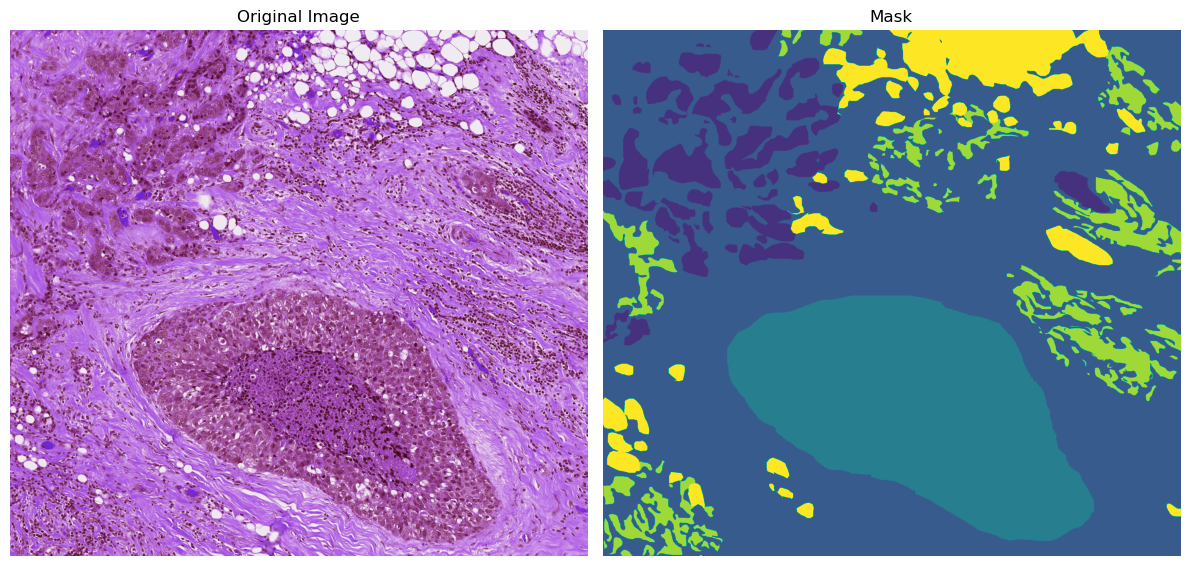

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an example of an image with class_6
image_path = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/balanced_dataset/class_6/TCGA-A2-A3XY-01Z-00-DX1.E57FC9BF-411E-4028-AC10-8BCA5D0C8472_[38151, 17757, 40600, 19989].png'
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)


# Read an example of an image with class_6no
mask_path = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/masks/class_6/TCGA-A2-A3XY-01Z-00-DX1.E57FC9BF-411E-4028-AC10-8BCA5D0C8472_[38151, 17757, 40600, 19989].png'
mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display the mask
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.title('Mask')
plt.axis('off')

plt.tight_layout()

# Save the figure
plt.savefig('/Users/tianale/Documents/DSAN6500/Project/final_submission/results/original_and_mask.png', dpi=300, bbox_inches='tight', pad_inches=0)

# Show the figure
plt.show()


In [ ]:
# Define directories
original_dir = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/masks/class_6'
match_dir = '/Users/tianale/Documents/DSAN6500/Project/wsirois/roi-level-annotations/tissue-bcss/images'
output_dir = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/images'

# Create output directories if they don't exist
output_original_dir = os.path.join(output_dir, 'class_6')
output_match_dir = os.path.join(output_dir, 'class_6')
os.makedirs(output_original_dir, exist_ok=True)
os.makedirs(output_match_dir, exist_ok=True)

# Get list of files
originals = os.listdir(original_dir)
matches = os.listdir(match_dir)

# Find matching files and copy them
for original in originals:
    original_name, original_ext = os.path.splitext(original)
    for match in matches:
        match_name, match_ext = os.path.splitext(match)
        if original_name == match_name:  # Matching files
            shutil.copy2(os.path.join(original_dir, original), os.path.join(output_original_dir, original))
            shutil.copy2(os.path.join(match_dir, match), os.path.join(output_match_dir, match))
            break  # Move to the next image

print(f"Files have been copied to {output_dir}")

Files have been copied to /Users/tianale/Documents/DSAN6500/Project/final_submission/data/images


In [ ]:
import os
import shutil

# Define directories
original_dir = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/masks/class_6no'
match_dir = '/Users/tianale/Documents/DSAN6500/Project/wsirois/roi-level-annotations/tissue-bcss/images'
output_dir = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/images'

# Create output directories if they don't exist
output_original_dir = os.path.join(output_dir, 'class_6no')
output_match_dir = os.path.join(output_dir, 'class_6no')
os.makedirs(output_original_dir, exist_ok=True)
os.makedirs(output_match_dir, exist_ok=True)

# Get list of files
originals = os.listdir(original_dir)
matches = os.listdir(match_dir)

# Find matching files and copy them
for original in originals:
    original_name, original_ext = os.path.splitext(original)
    for match in matches:
        match_name, match_ext = os.path.splitext(match)
        if original_name == match_name:  # Matching files
            shutil.copy2(os.path.join(original_dir, original), os.path.join(output_original_dir, original))
            shutil.copy2(os.path.join(match_dir, match), os.path.join(output_match_dir, match))
            break  # Move to the next image

print(f"Files have been copied to {output_dir}")

Files have been copied to /Users/tianale/Documents/DSAN6500/Project/final_submission/data/images


In [ ]:
import os
import shutil
import random

# Balance the dataset for an even distribution between class_6 and clasS_6no
# Set the seed for reproducibility
seed = 42
random.seed(seed)

# Define the folders
base_dir = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/images'
class_names = ['class_6', 'class_6no']
balanced_dir = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/balanced_dataset'

# Create directories for the balanced dataset
for class_name in class_names:
    os.makedirs(os.path.join(balanced_dir, class_name), exist_ok=True)

# Get the list of files for each class
class1_files = os.listdir(os.path.join(base_dir, 'class_6'))
class2_files = os.listdir(os.path.join(base_dir, 'class_6no'))

# Determine the number of samples to take based on the smaller class
num_samples = min(len(class1_files), len(class2_files))

# Randomly sample the images
class1_sampled = random.sample(class1_files, num_samples)
class2_sampled = random.sample(class2_files, num_samples)

# Function to copy files to the balanced dataset directory
def copy_files(file_list, source_dir, target_dir):
    for file_name in file_list:
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(target_dir, file_name))

# Copy the sampled files to the balanced dataset directory
copy_files(class1_sampled, os.path.join(base_dir, 'class_6'), os.path.join(balanced_dir, 'class_6'))
copy_files(class2_sampled, os.path.join(base_dir, 'class_6no'), os.path.join(balanced_dir, 'class_6no'))

print(f"Balanced dataset created with {num_samples} images for each class.")


Balanced dataset created with 25 images for each class.


In [ ]:
import os
import shutil
import random

# Create train, test, and validation sets
# Define the paths
base_dir = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/balanced_dataset'
class_names = ['class_6', 'class_6no']
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Create directories if they don't exist
for split_dir in [train_dir, val_dir, test_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

# Define split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Function to split the dataset
def split_dataset(class_dir, train_dir, val_dir, test_dir, train_ratio, val_ratio):
    files = os.listdir(class_dir)
    random.shuffle(files)

    train_size = int(train_ratio * len(files))
    val_size = int(val_ratio * len(files))

    train_files = files[:train_size]
    val_files = files[train_size:train_size + val_size]
    test_files = files[train_size + val_size:]

    for f in train_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(train_dir, f))

    for f in val_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(val_dir, f))

    for f in test_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(test_dir, f))

# Split the dataset for each class
for class_name in class_names:
    class_dir = os.path.join(base_dir, class_name)
    split_dataset(class_dir, os.path.join(train_dir, class_name), os.path.join(val_dir, class_name), os.path.join(test_dir, class_name), train_ratio, val_ratio)


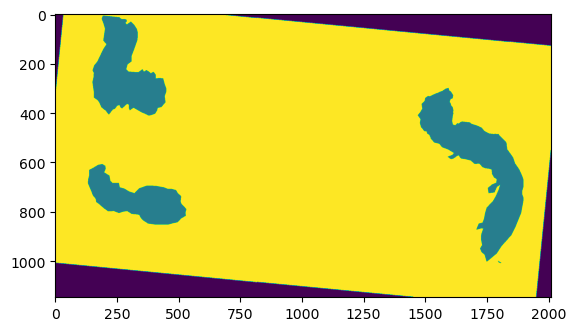

Unique colors in the image:
0
2
3
7


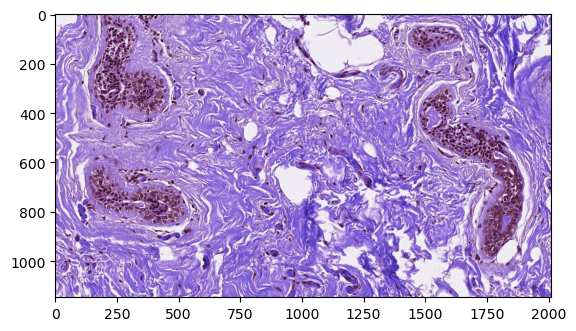

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an example of an image with class_6no
image_path = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/masks/class_6no/TCGA-GI-A2C9-01Z-00-DX1.90181423-51ED-41FE-9B8F-973A67793D4F_[10444, 5924, 12455, 7071].png'
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Display the image
plt.imshow(image)
plt.show()

# Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, image.shape[2]) if len(image.shape) == 3 else image.reshape(-1)

# Find unique colors
unique_colors = np.unique(pixels, axis=0)

# Print the unique colors
print("Unique colors in the image:")
for color in unique_colors:
    print(color)

# Read an example of an image with class_6no
image_path = '/Users/tianale/Documents/DSAN6500/Project/final_submission/data/balanced_dataset/class_6no/TCGA-GI-A2C9-01Z-00-DX1.90181423-51ED-41FE-9B8F-973A67793D4F_[10444, 5924, 12455, 7071].png'
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Display the image
plt.imshow(image)
plt.show()